In [1]:
import numpy as np
import cv2
import os
from utils import cv2_imshow

In [2]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.001)

########################################Blob Detector##############################################

# Setup SimpleBlobDetector parameters.
blobParams = cv2.SimpleBlobDetector_Params()

# Change thresholds
blobParams.minThreshold = 30
blobParams.maxThreshold = 255

# Filter by Area.
blobParams.filterByArea = True
blobParams.minArea = 1000  # minArea may be adjusted to suit for your experiment
blobParams.maxArea = 100000  # maxArea may be adjusted to suit for your experiment

# Filter by Circularity
blobParams.filterByCircularity = True
blobParams.minCircularity = 0.4

# Filter by Convexity
blobParams.filterByConvexity = True
blobParams.minConvexity = 0.87

# Filter by Inertia
blobParams.filterByInertia = True
blobParams.minInertiaRatio = 0.01

# Create a detector with the parameters
blobDetector = cv2.SimpleBlobDetector_create(blobParams)

In [3]:
objp = np.zeros((44, 3), np.float32)
for x in range(0, 11):
    for y in range(0, 4):
        objp[4 * x + y] = (x * 36, y * 72 + (x % 2) * 36, 0)

In [4]:
objpoints = None  # 3d point in real world space
imgpoints = None  # 2d points in image plane.
for f in os.listdir("images/"):
    if "test" in f:
        continue
    img = cv2.imread(os.path.join("images", f))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    keypoints = blobDetector.detect(gray)
    im_with_keypoints = cv2.drawKeypoints(
        img,
        keypoints,
        np.array([]),
        (0, 255, 0),
        cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
    )
    ret, corners = cv2.findCirclesGrid(
        gray,
        (4, 11),
        flags=cv2.CALIB_CB_ASYMMETRIC_GRID + cv2.CALIB_CB_CLUSTERING,
        blobDetector=blobDetector,
    )  # Find the circle grid
#     cv2_imshow(im_with_keypoints)
    # print(keypoints)
    if corners is not None and ret:
        print(f"Corners found on {f}")
        objpoints = (
            np.array([objp])
            if objpoints is None
            else np.append(objpoints, [objp], axis=0)
        )
        imgpoints = (
            np.array([corners])
            if imgpoints is None
            else np.append(imgpoints, [corners], axis=0)
        )
    else:
        print(f"Skip image {f}")


print(objpoints.shape)
print(imgpoints.shape)
(i1, i2, i3, i4) = imgpoints.shape
imgpoints = imgpoints.reshape([i1, i2, i4])
print(imgpoints.shape)

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(
    objpoints, imgpoints, gray.shape[::-1], None, None
)

print(mtx)
print(dist)

Corners found on IMG_7700.JPG
Corners found on IMG_7701.JPG
Corners found on IMG_7702.JPG
Corners found on IMG_7697.JPG
Corners found on IMG_7695.JPG
Corners found on IMG_7692.JPG
Corners found on IMG_7698.JPG
Corners found on IMG_7693.JPG
Corners found on IMG_7694.JPG
Corners found on IMG_7699.JPG
Corners found on IMG_7703.JPG
Corners found on IMG_7691.JPG
Corners found on IMG_7696.JPG
(13, 44, 3)
(13, 44, 1, 2)
(13, 44, 2)
[[3.33407856e+03 0.00000000e+00 2.01197220e+03]
 [0.00000000e+00 3.34457985e+03 1.47350986e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[ 3.85059305e-01 -3.80608514e+00  9.30124953e-04  2.64858840e-03
   1.56049974e+01]]


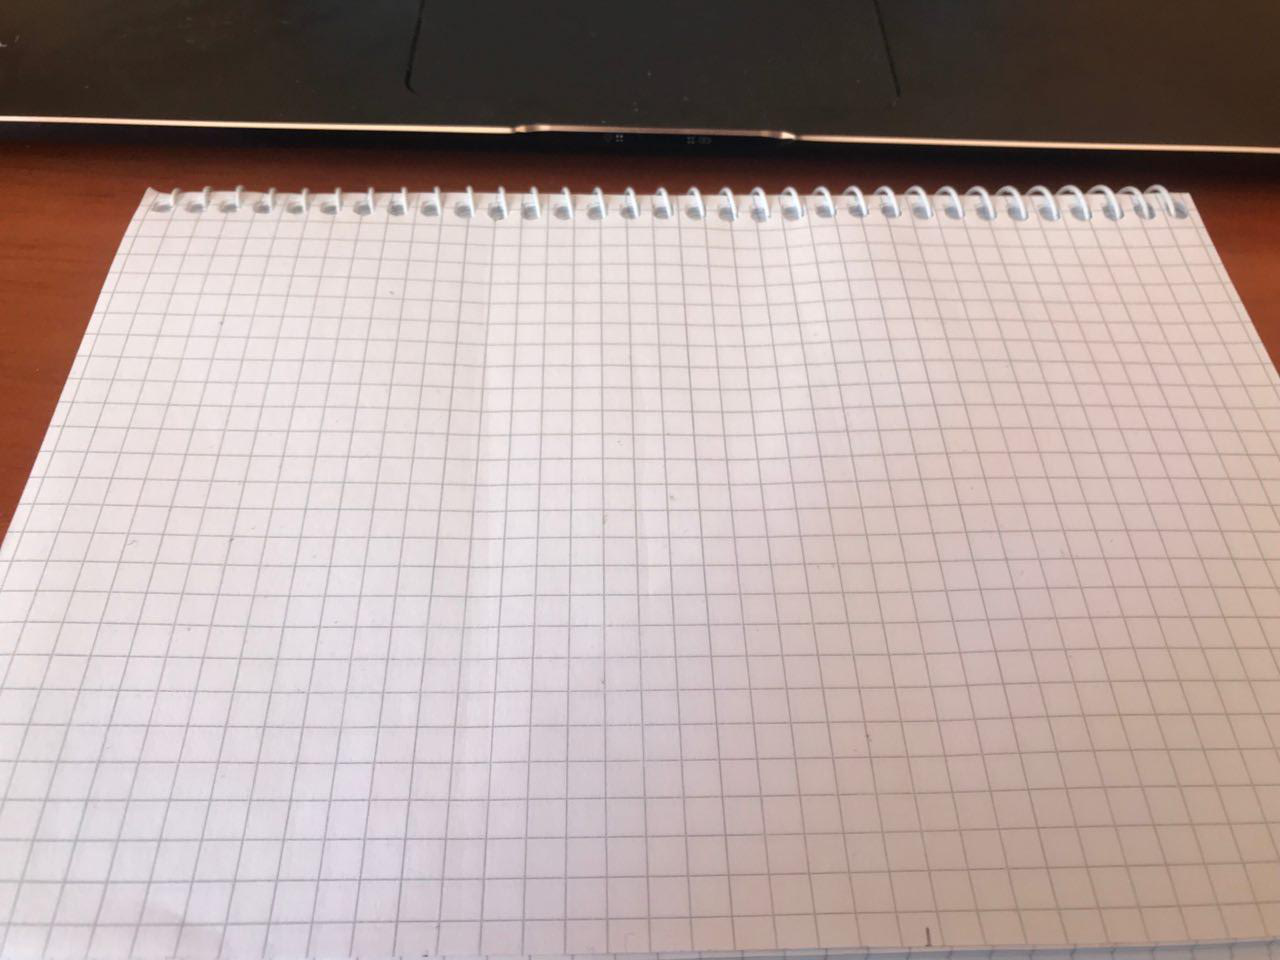

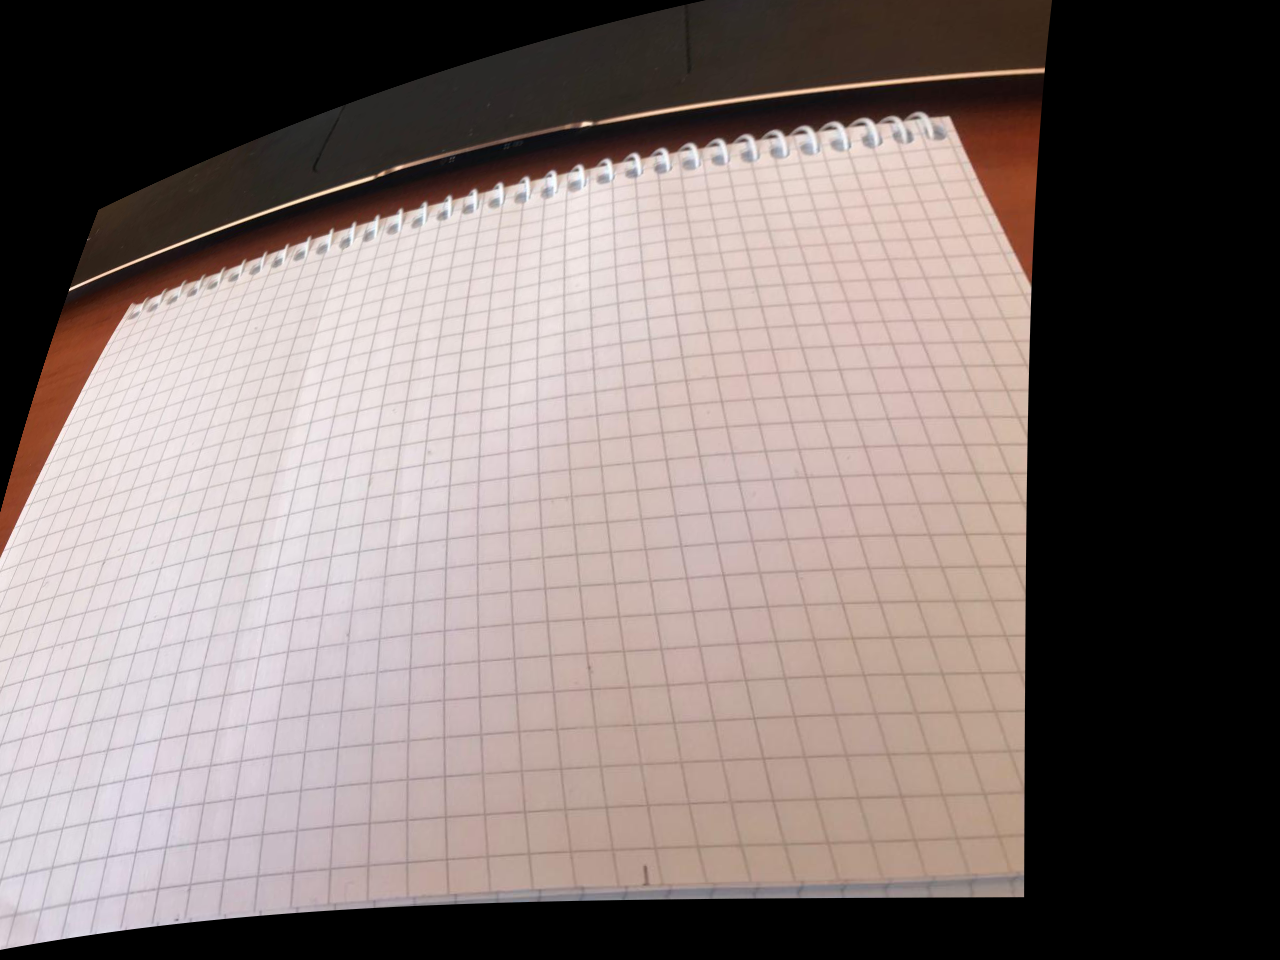

In [5]:
# dist = np.array([0,0,0,0,0])
test = cv2.imread("images/test.jpg")
cv2_imshow(test)

(w, h) = test.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w, h), 1, (w, h))
dst = cv2.undistort(test, mtx, dist, None, newcameramtx)
# mapx,mapy = cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)
# dst = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)

# crop the image
# x, y, w, h = roi
# dst = dst[y : y + h, x : x + w]
# dst = cv2.resize(dst, (0,0), fx=0.5, fy=0.25)
cv2_imshow(dst)

### It seems that photo was calibrated from the beginning. After undistortion lines don't seem to be straight.